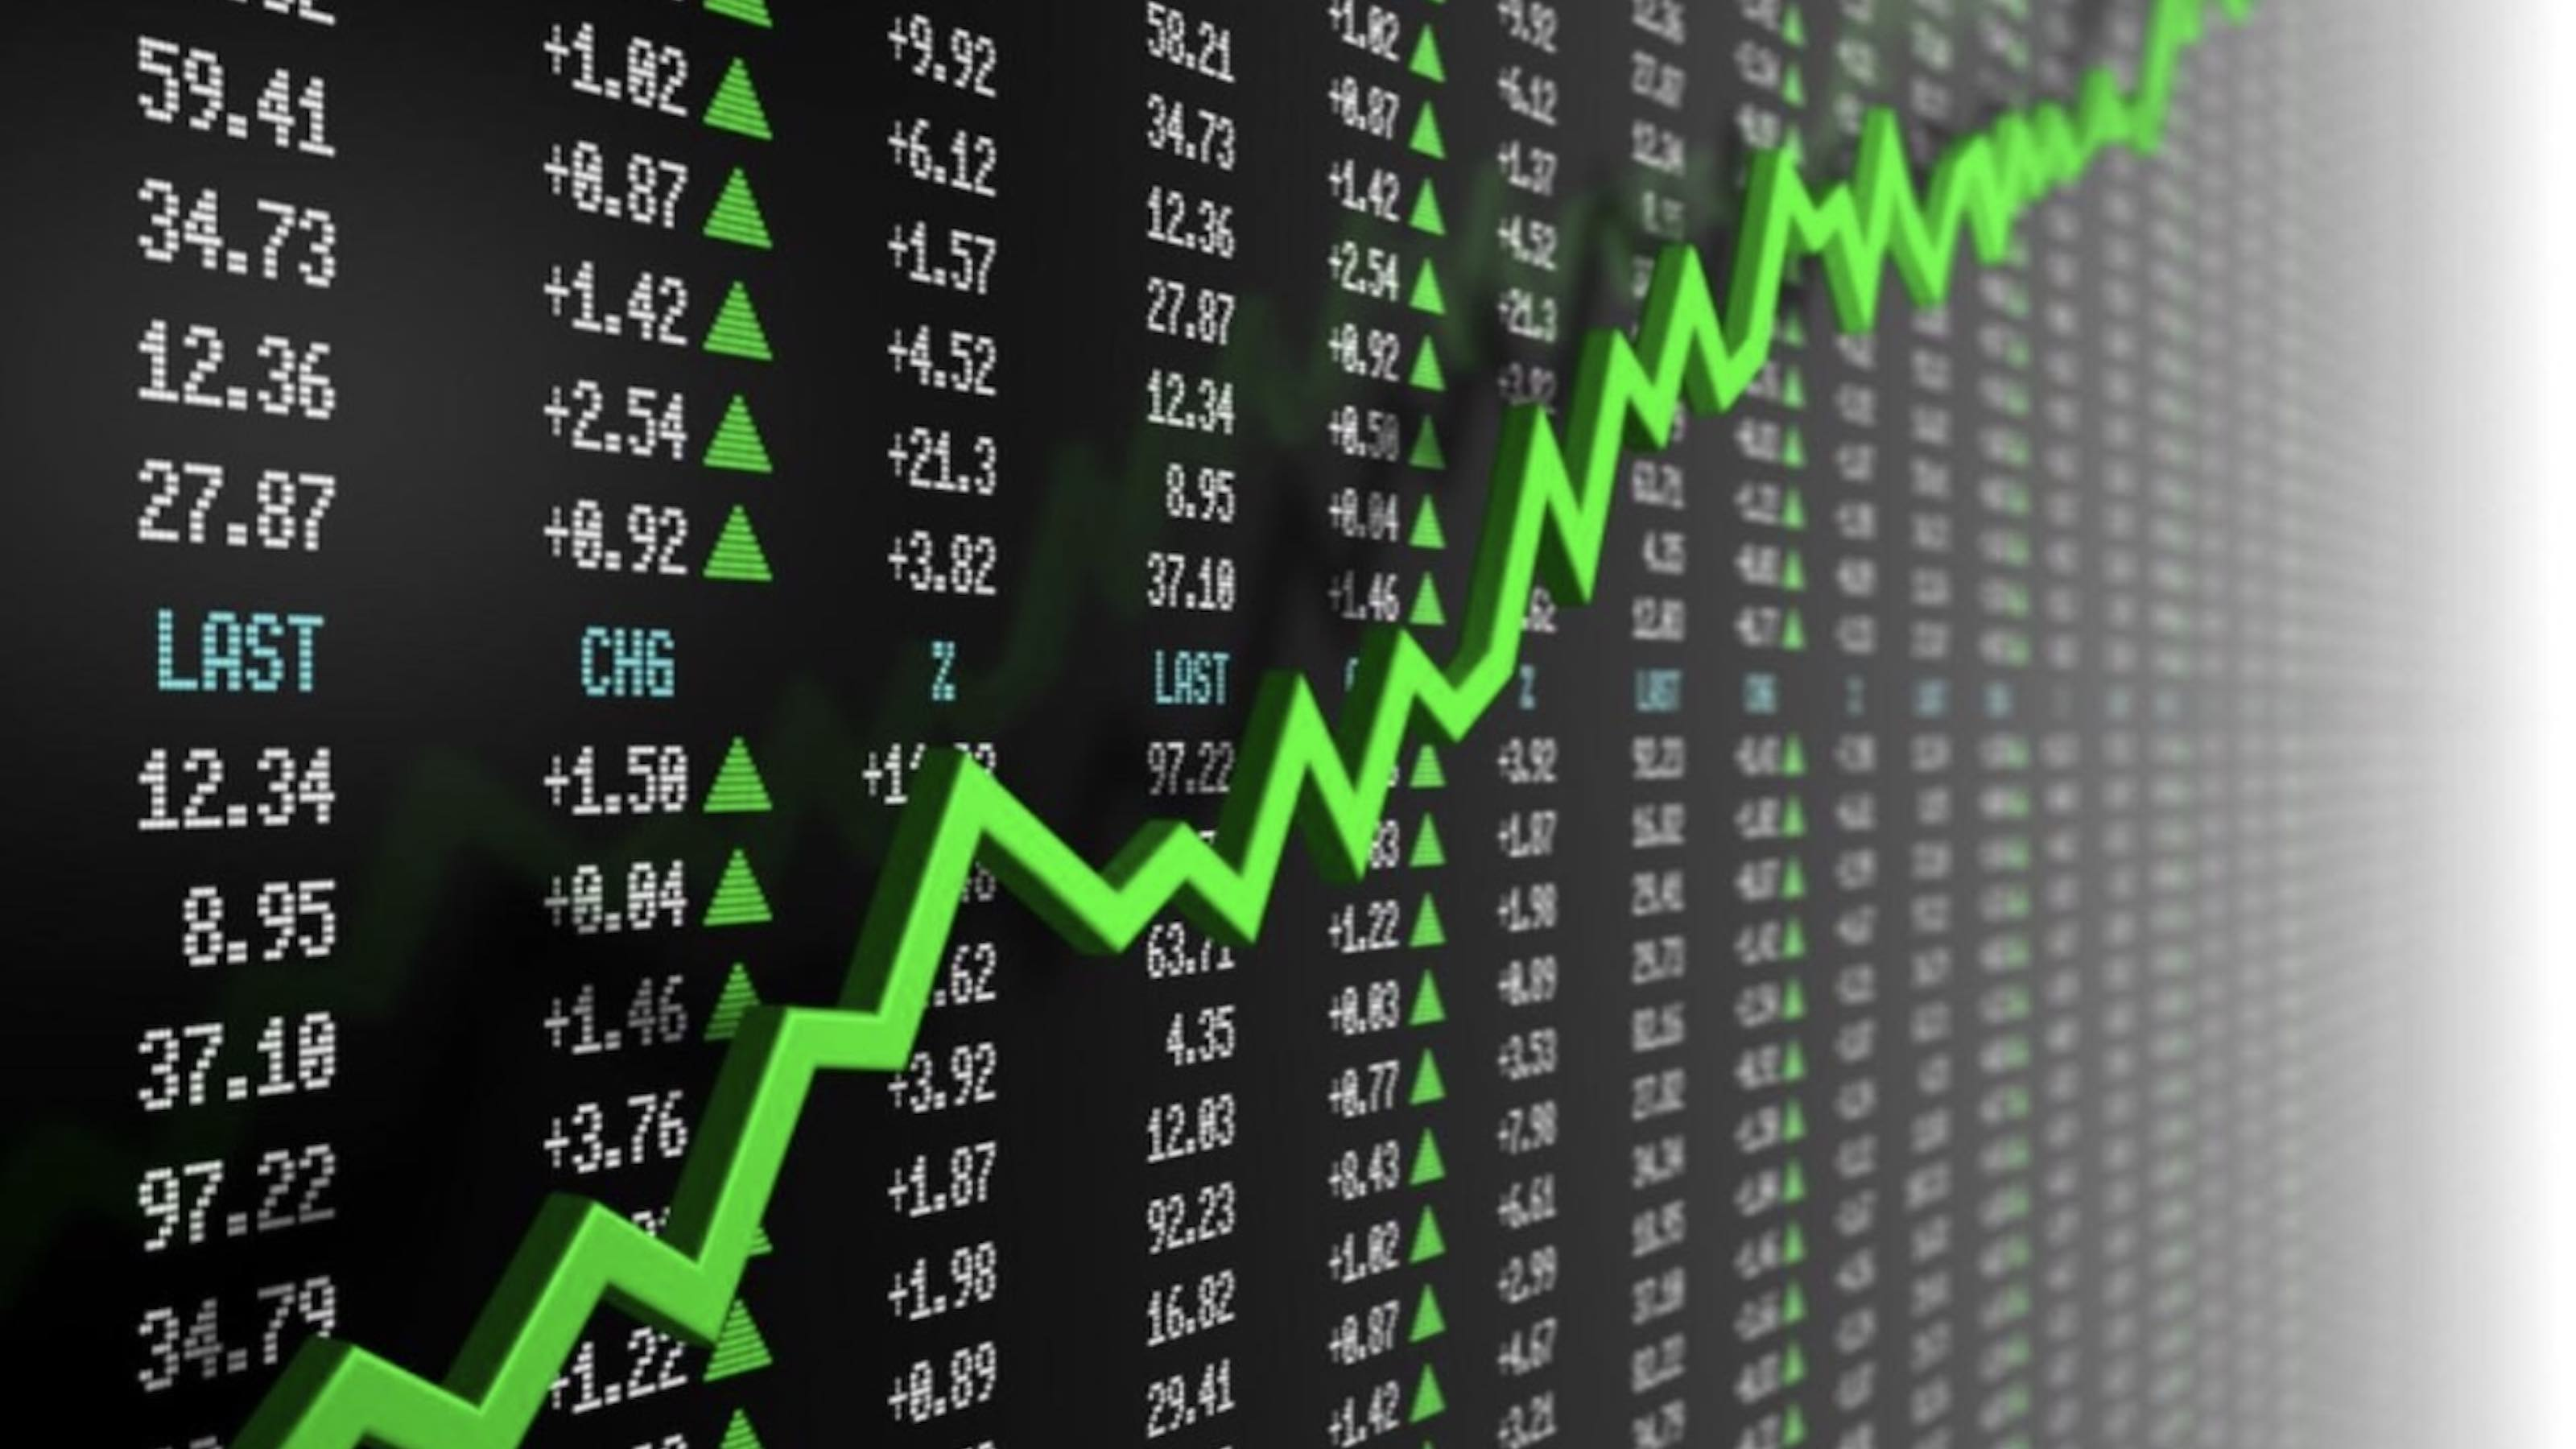

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

In [2]:
from nsepy import get_history
nifty = get_history(symbol="NIFTY",
                    start=date(2000,1,1),
                    end=date.today(),
                    index=True)
nifty.tail()

Open      High       Low     Close     Volume      Turnover
Date                                                                       
2022-05-25  16196.35  16223.35  16006.95  16025.80  243342347  2.140014e+11
2022-05-26  16105.00  16204.45  15903.70  16170.15  314305739  2.772121e+11
2022-05-27  16296.60  16370.60  16221.95  16352.45  274064956  2.134198e+11
2022-05-30  16527.90  16695.50  16506.15  16661.40  251400757  2.121650e+11
2022-05-31  16578.45  16690.75  16521.90  16584.55  651613610  5.292935e+11

In [3]:
from nsepy import get_index_pe_history
nifty_pe = get_index_pe_history(symbol="NIFTY",
                                start=date(2000,1,1),
                                end=date.today())
nifty_pe.tail()

P/E   P/B  Div Yield
Date                              
2022-05-26  19.88  4.13       1.44
2022-05-27  20.27  4.18       1.43
2022-05-30  20.65  4.26       1.40
2022-05-31  20.44  4.24       1.43
2022-06-01  20.45  4.22       1.44

In [4]:
type(nifty.index)

pandas.core.indexes.base.Index

In [5]:
nifty.index=pd.to_datetime(nifty.index)

In [6]:
df=pd.merge(nifty, nifty_pe, left_index=True, right_index=True)
df.tail()

Open      High       Low     Close     Volume      Turnover  \
Date                                                                          
2022-05-25  16196.35  16223.35  16006.95  16025.80  243342347  2.140014e+11   
2022-05-26  16105.00  16204.45  15903.70  16170.15  314305739  2.772121e+11   
2022-05-27  16296.60  16370.60  16221.95  16352.45  274064956  2.134198e+11   
2022-05-30  16527.90  16695.50  16506.15  16661.40  251400757  2.121650e+11   
2022-05-31  16578.45  16690.75  16521.90  16584.55  651613610  5.292935e+11   

              P/E   P/B  Div Yield  
Date                                
2022-05-25  19.74  4.09       1.38  
2022-05-26  19.88  4.13       1.44  
2022-05-27  20.27  4.18       1.43  
2022-05-30  20.65  4.26       1.40  
2022-05-31  20.44  4.24       1.43

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5575 entries, 2000-01-03 to 2022-05-31
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5575 non-null   float64
 1   High       5575 non-null   float64
 2   Low        5575 non-null   float64
 3   Close      5575 non-null   float64
 4   Volume     5575 non-null   int64  
 5   Turnover   5575 non-null   float64
 6   P/E        5575 non-null   float64
 7   P/B        5575 non-null   float64
 8   Div Yield  5575 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 435.5 KB


In [8]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

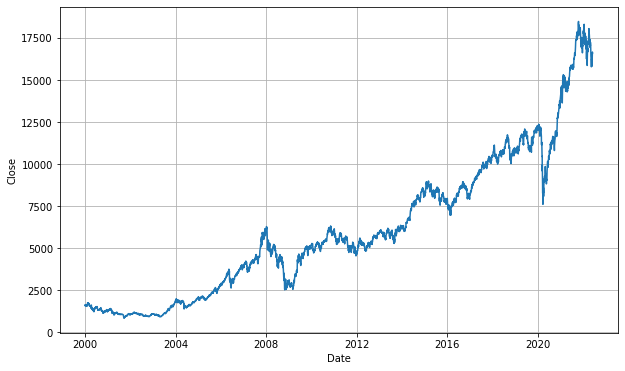

In [9]:
#plot close price
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Date", y="Close")
plt.grid(True)
#plt.xlabel('Date')
#plt.ylabel('Close Prices')
#plt.plot(df['Close'])
#plt.title('nifty - 50 closing price')
plt.show()

### Probability distribution to visualize the data in our series.

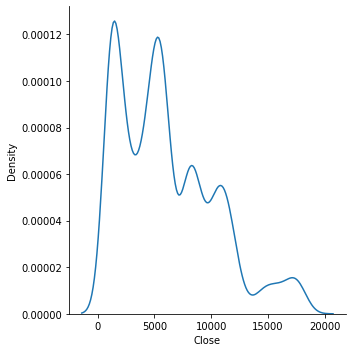

In [10]:
#nifty['Close'].plot(kind='kde')
sns.displot(nifty, x="Close", kind="kde")

plt.show()

## ADF (Augmented Dickey-Fuller) Test

In [11]:
# Test of stationarity
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df[['P/E']].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.981184
p-value: 0.036689


In [12]:
# Test of stationarity
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df[['Close']].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.014799
p-value: 0.994420


* **p-value: 0.994420 > 0.05**
* Since P-value is greater than the significance level, let’s difference the series and see how the autocorrelation plot looks like.

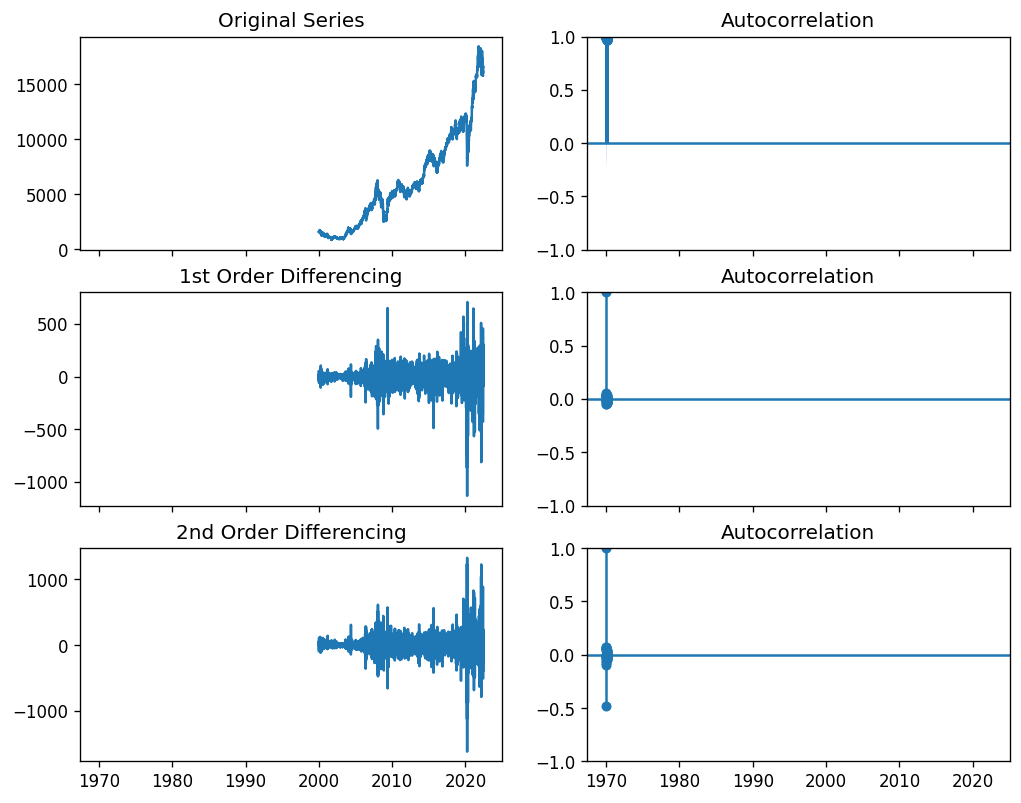

In [13]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df[['Close']]); axes[0, 0].set_title('Original Series')
plot_acf(df[['Close']], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df[['Close']].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df[['Close']].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df[['Close']].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df[['Close']].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

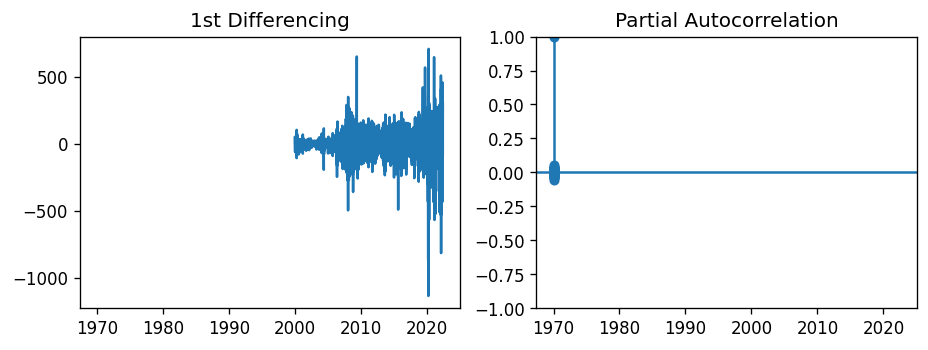

In [14]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df[['Close']].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df[['Close']].diff().dropna(), ax=axes[1], method='ywm')

plt.show()

In [15]:
df_close = df['Close']

In [16]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

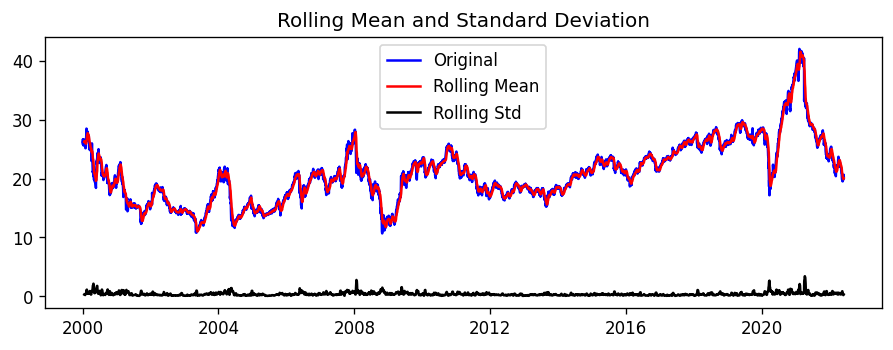

Results of dickey fuller test
Test Statistics                  -2.981184
p-value                           0.036689
No. of lags used                 21.000000
Number of observations used    5553.000000
critical value (1%)              -3.431528
critical value (5%)              -2.862061
critical value (10%)             -2.567047
dtype: float64


In [17]:
test_stationarity(df[['P/E']])

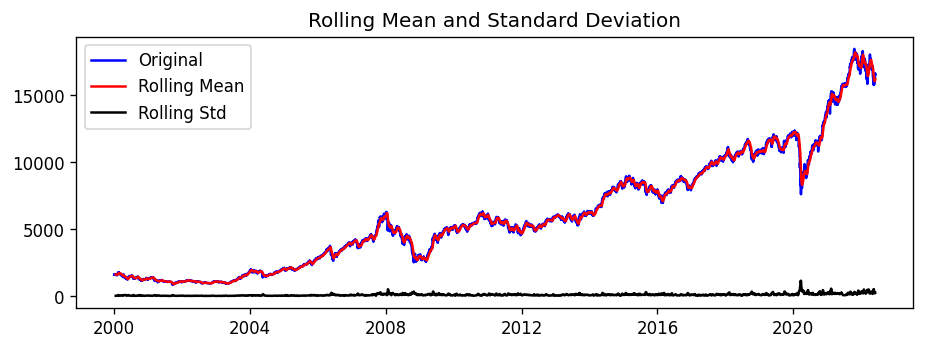

Results of dickey fuller test
Test Statistics                   1.014799
p-value                           0.994420
No. of lags used                 33.000000
Number of observations used    5541.000000
critical value (1%)              -3.431531
critical value (5%)              -2.862062
critical value (10%)             -2.567048
dtype: float64


In [18]:
test_stationarity(df[['Close']])

* The mean and standard deviation is increasing as shown in the graph above, indicating that our series isn’t stationary.

We can’t rule out the Null hypothesis because the p-value is bigger than 0.05. Additionally, the test statistics exceed the critical values. As a result, the data is nonlinear.

Seasonality and trend may need to be separated from our series before we can undertake a time series analysis. This approach will cause the resulting series to become stagnant.

Let’s isolate the time series from the Trend and Seasonality.

<Figure size 1080x360 with 0 Axes>

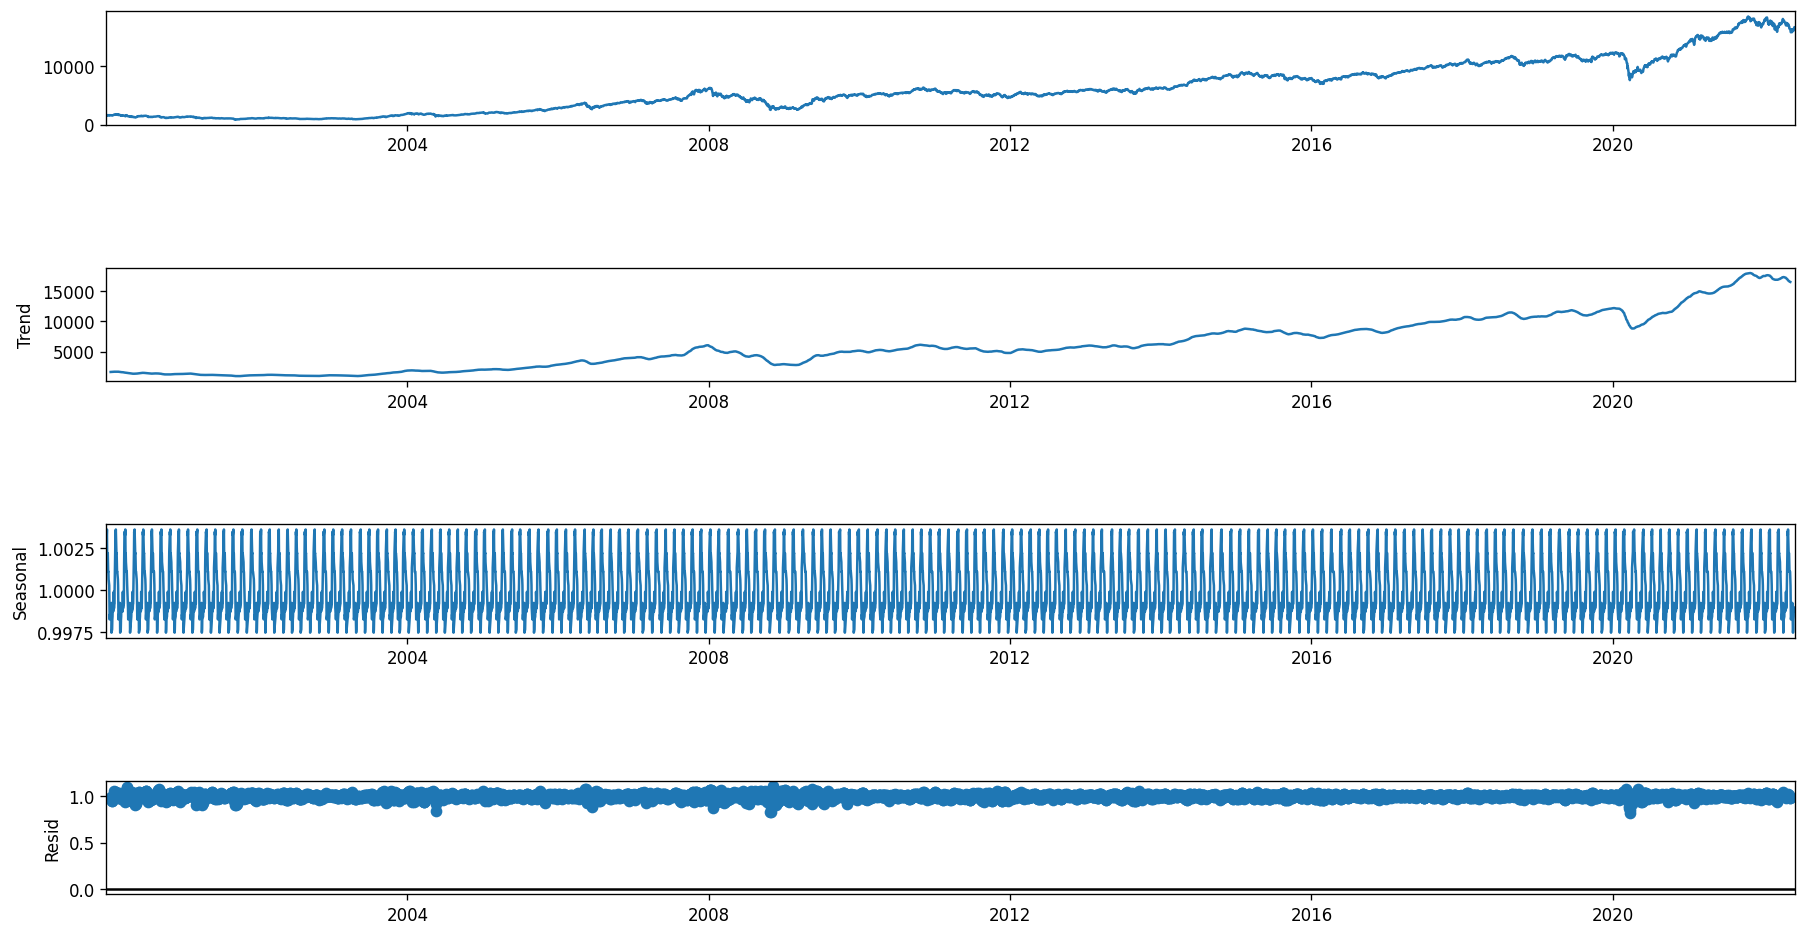

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df[['Close']], model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)
plt.show()

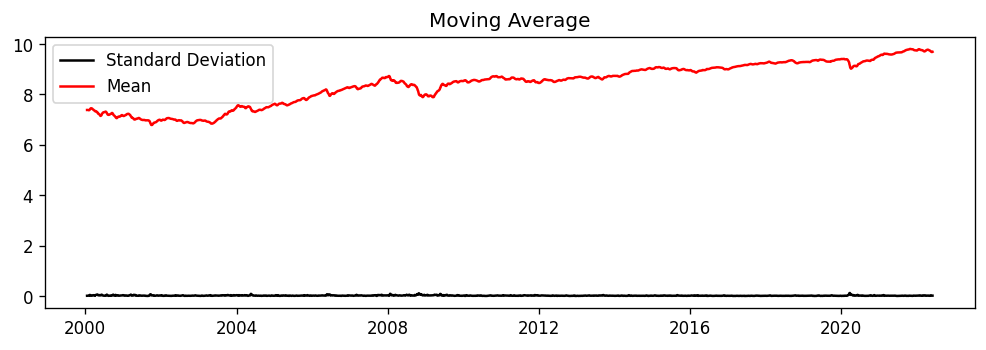

In [20]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 3
df_log = np.log(df[['Close']])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
#plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend(loc='best')
plt.show()

In [21]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

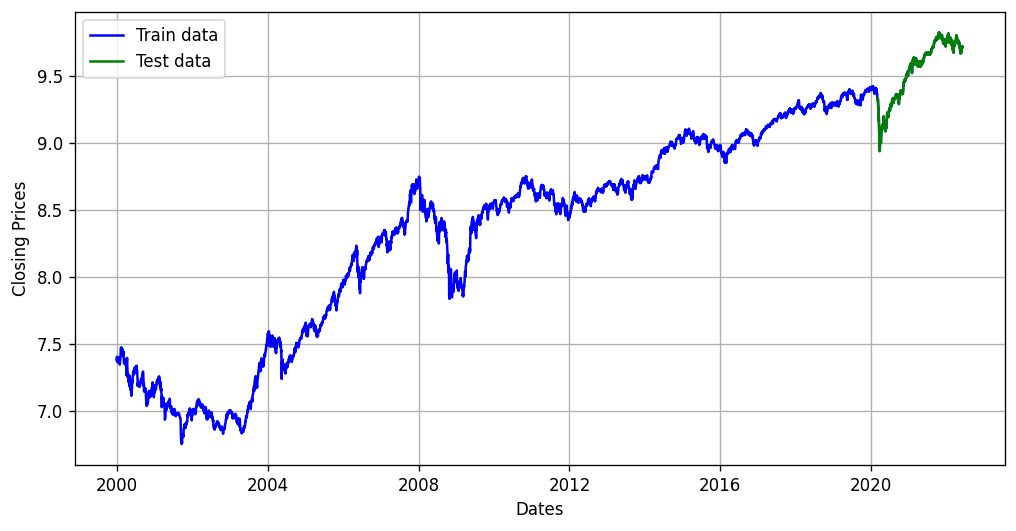

In [22]:
plt.figure(figsize=(10,5))

plt.plot(df_log, 'blue', label='Train data')
plt.plot(test_data, 'green', label='Test data')

plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')

plt.legend()
plt.show()

## Auto ARIMA: Automatically discover the optimal order for an ARIMA model.

In [23]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-28415.647, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-28442.446, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-28445.170, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-28413.951, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-28448.633, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-28449.402, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-28451.390, Time=0.61 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-28449.404, Time=1.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-28447.408, Time=0.76 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-28449.914, Time=0.23 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 5.009 seconds


In [24]:
model_autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5014
Model:               SARIMAX(2, 1, 0)   Log Likelihood               14229.695
Date:                Wed, 01 Jun 2022   AIC                         -28451.390
Time:                        17:40:22   BIC                         -28425.311
Sample:                             0   HQIC                        -28442.251
                               - 5014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.000      1.800      0.072   -3.31e-05       0.001
ar.L1          0.0793      0.008      9.985      0.000       0.064       0.095
ar.L2         -0.0467      0.009     -5.445      0.000      -0.064      -0.030
sigma2         0.0002   1.73e-06    115.944      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             17365.01
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

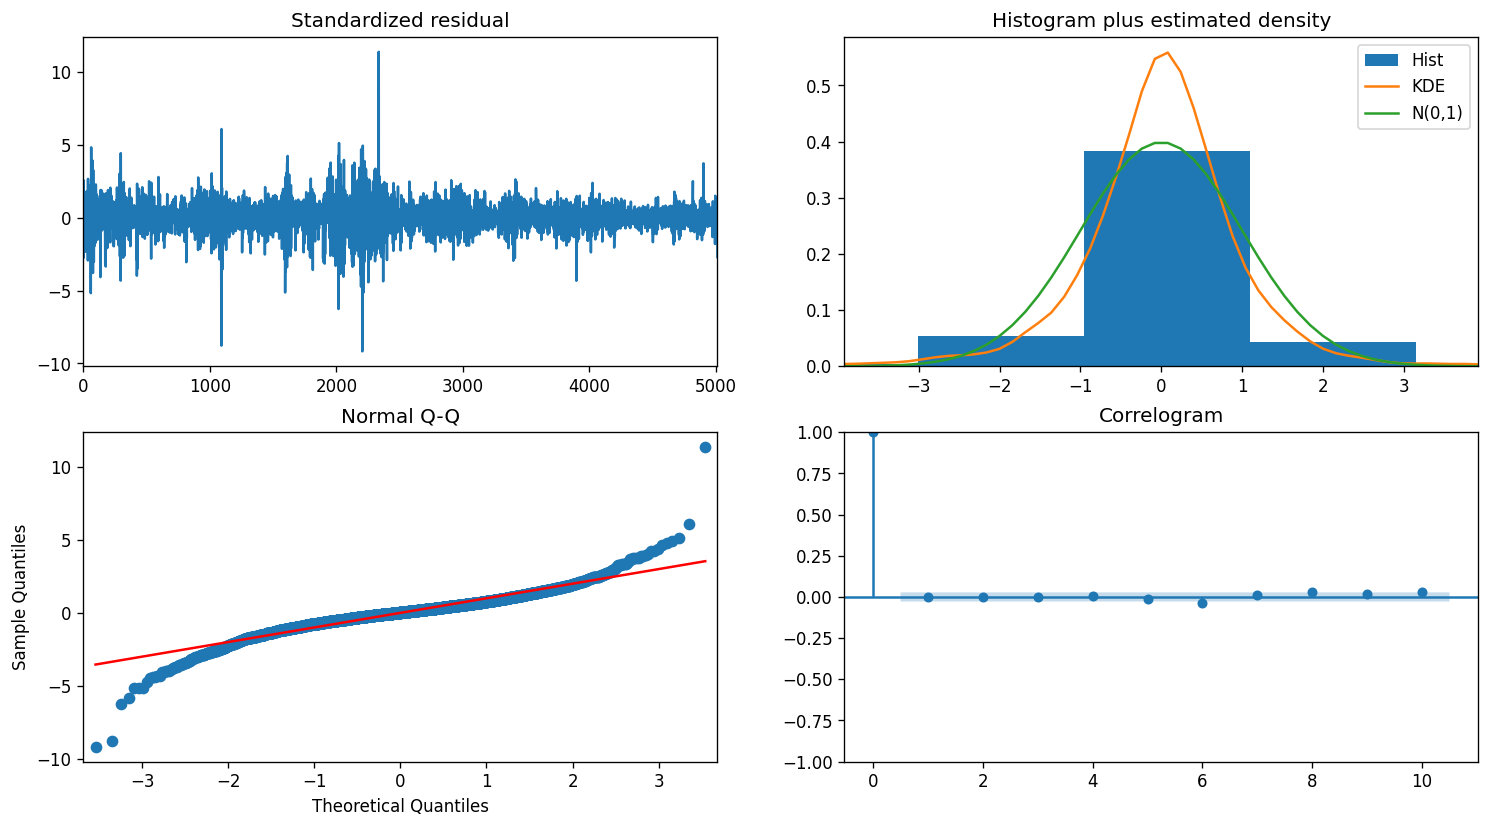

In [25]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Top left: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

Top Right: The density plot on the top right suggests a normal distribution with a mean of zero.

Bottom left: The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.

Bottom Right: The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, you’ll need to add more Xs (predictors) to the model.

As a result, the Auto ARIMA model assigned the values 2, 1, and 0 to, p, d, and q, respectively.

In [26]:
train_data.shape, test_data.shape

((5014, 1), (558, 1))

In [27]:
y_train = train_data.asfreq('B')

In [28]:
from statsmodels.tsa.arima.model import ARIMA

mod = ARIMA(y_train, order=(2, 1, 0))
res = mod.fit()

In [29]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 5257
Model:                 ARIMA(2, 1, 0)   Log Likelihood               14144.307
Date:                Wed, 01 Jun 2022   AIC                         -28282.614
Time:                        17:40:24   BIC                         -28262.913
Sample:                    01-06-2000   HQIC                        -28275.727
                         - 02-28-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0614      0.008      7.739      0.000       0.046       0.077
ar.L2         -0.0314      0.009     -3.673      0.000      -0.048      -0.015
sigma2         0.0002   1.65e-06    117.566      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             23276.66
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
test_data = test_data.asfreq('B')
test_data.isnull().sum()

Close    30
dtype: int64

In [31]:
predictions =res.get_forecast(steps=7, exog=test_data['Close'][:7])
predictions.summary_frame()

Close           mean   mean_se  mean_ci_lower  mean_ci_upper
2020-03-02  9.321626  0.013936       9.294313       9.348939
2020-03-03  9.322677  0.020322       9.282847       9.362507
2020-03-04  9.322811  0.024910       9.273987       9.371634
2020-03-05  9.322786  0.028751       9.266435       9.379137
2020-03-06  9.322780  0.032140       9.259787       9.385773
2020-03-09  9.322781  0.035205       9.253780       9.391781
2020-03-10  9.322781  0.038024       9.248256       9.397306

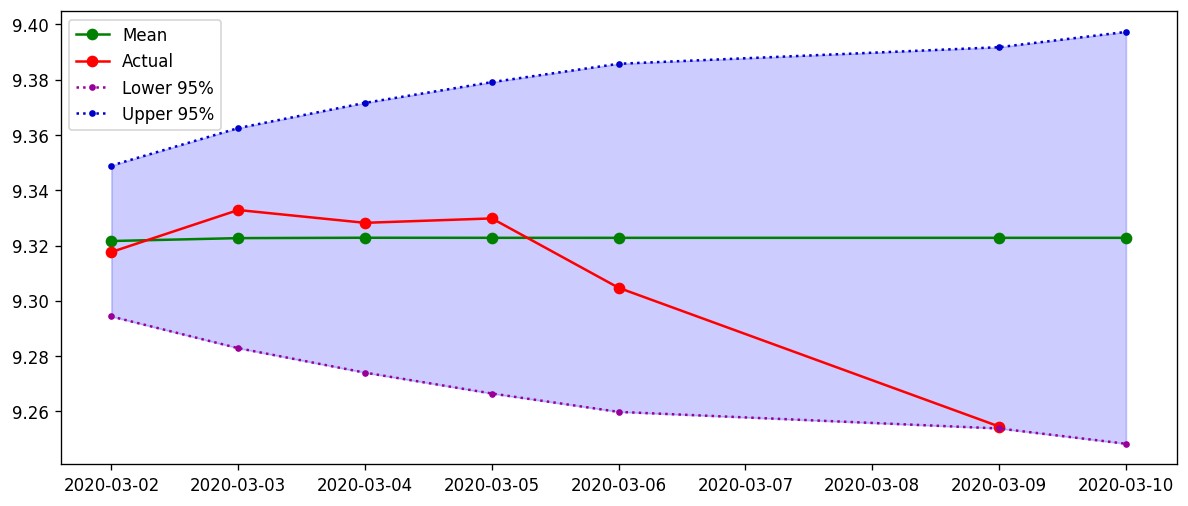

In [32]:
plt.figure(figsize=(12,5))
predicted, = plt.plot(test_data['Close'][:7].index, 
                      predictions.summary_frame()['mean'], 'go-', label='Mean')

actual,  = plt.plot( test_data['Close'][:7], 'ro-', label='Actual')
 
lower, = plt.plot(test_data['Close'][:7].index, 
                  predictions.summary_frame()['mean_ci_lower'], 
                  color='#990099', marker='.', linestyle=':', label='Lower 95%')
 
upper, = plt.plot(test_data['Close'][:7].index, 
                  predictions.summary_frame()['mean_ci_upper'], 
                  color='#0000cc', marker='.', linestyle=':', label='Upper 95%')
 
plt.fill_between(test_data['Close'][:7].index, 
                 predictions.summary_frame()['mean_ci_lower'], 
                 predictions.summary_frame()['mean_ci_upper'], 
                 color = 'b', alpha = 0.2)

plt.legend(handles=[predicted, actual, lower, upper])

plt.show()

In [33]:
predict = res.get_forecast(len(test_data.index), exog=test_data)
predict.summary_frame()
#res.get_forecast(exog=test_data)

Close           mean   mean_se  mean_ci_lower  mean_ci_upper
2020-03-02  9.321626  0.013936       9.294313       9.348939
2020-03-03  9.322677  0.020322       9.282847       9.362507
2020-03-04  9.322811  0.024910       9.273987       9.371634
2020-03-05  9.322786  0.028751       9.266435       9.379137
2020-03-06  9.322780  0.032140       9.259787       9.385773
...              ...       ...            ...            ...
2022-05-25  9.322781  0.346894       8.642881      10.002681
2022-05-26  9.322781  0.347191       8.642298      10.003263
2022-05-27  9.322781  0.347489       8.641716      10.003846
2022-05-30  9.322781  0.347785       8.641134      10.004428
2022-05-31  9.322781  0.348082       8.640553      10.005009

[587 rows x 4 columns]

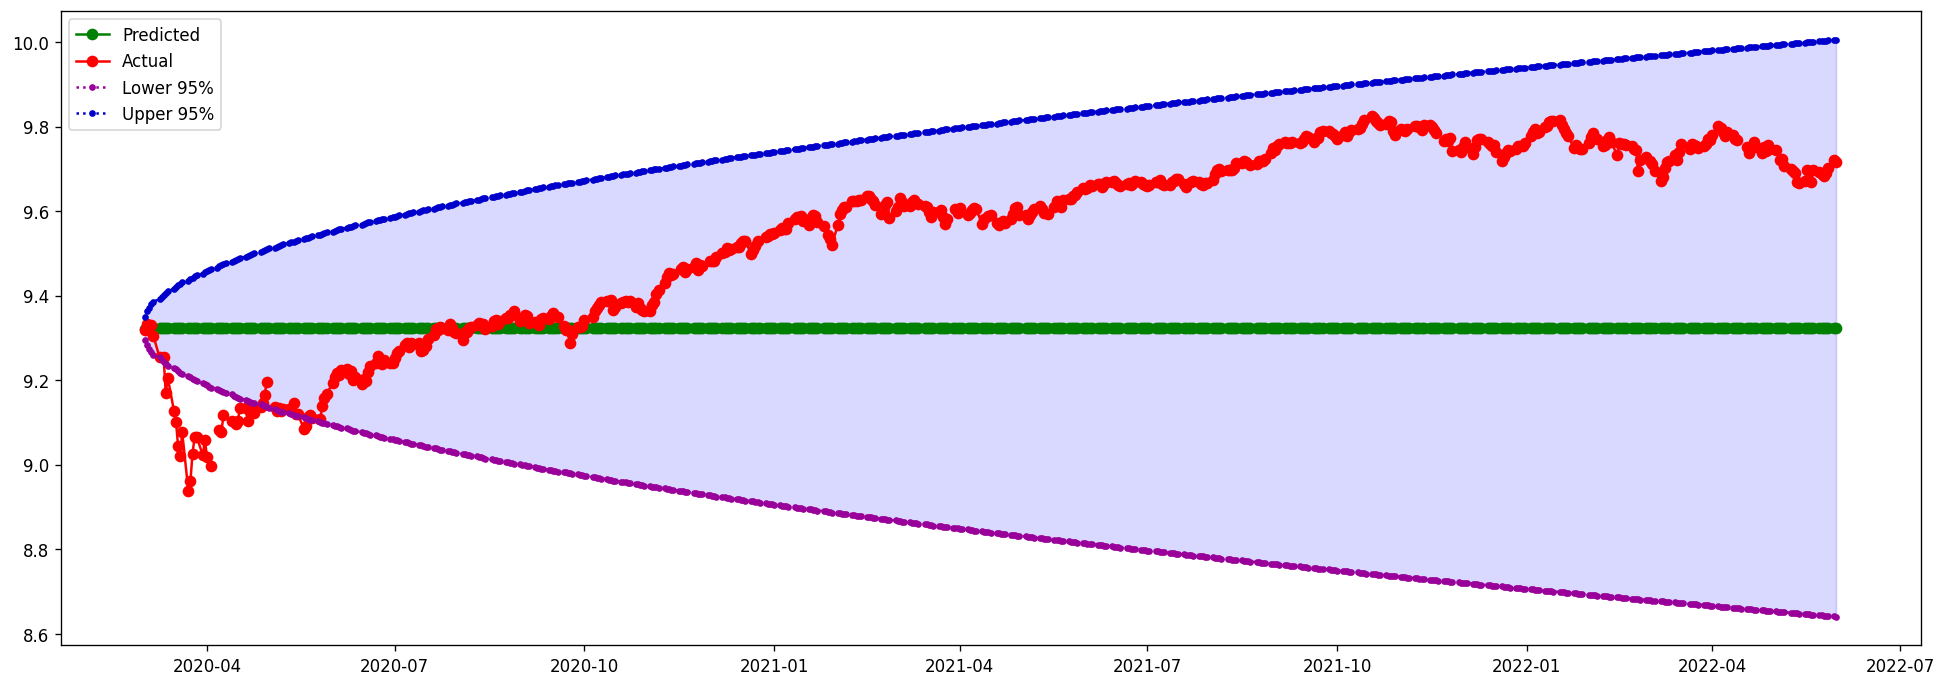

In [34]:
plt.figure(figsize=(20,7))
#Train, = plt.plot(train_data.index, train_data['Close'], 'go-', label='Train')
predicted, = plt.plot(test_data.index, predict.summary_frame()['mean'].values, 'go-', label='Predicted')

actual,  = plt.plot( test_data[['Close']], 'ro-', label='Actual')
 
lower, = plt.plot(test_data.index, predict.summary_frame()['mean_ci_lower'].values, color='#990099',
                  marker='.', linestyle=':', label='Lower 95%')
 
upper, = plt.plot(test_data.index, predict.summary_frame()['mean_ci_upper'].values, 
                  color='#0000cc', marker='.', linestyle=':', label='Upper 95%')
 
plt.fill_between(test_data.index, predict.summary_frame()['mean_ci_lower'].values, predict.summary_frame()['mean_ci_upper'].values, 
                 color = 'b', alpha = 0.15)
plt.legend(handles=[predicted, actual, lower, upper])
plt.show()

In [35]:
predict.summary_frame().index

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13',
               ...
               '2022-05-18', '2022-05-19', '2022-05-20', '2022-05-23',
               '2022-05-24', '2022-05-25', '2022-05-26', '2022-05-27',
               '2022-05-30', '2022-05-31'],
              dtype='datetime64[ns]', length=587, freq='B')

In [36]:
test_data.index

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13',
               ...
               '2022-05-18', '2022-05-19', '2022-05-20', '2022-05-23',
               '2022-05-24', '2022-05-25', '2022-05-26', '2022-05-27',
               '2022-05-30', '2022-05-31'],
              dtype='datetime64[ns]', name='Date', length=587, freq='B')

In [37]:
test_data['pred_close']=predict.summary_frame()['mean'].values
test_data.isnull().sum()

Close         30
pred_close     0
dtype: int64

In [38]:
test_data=test_data.dropna()
test_data.shape

(557, 2)

In [40]:
# report performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
mse = mean_squared_error(test_data['Close'], test_data['pred_close'])
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Close'], test_data['pred_close'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data['Close'], test_data['pred_close']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(test_data['pred_close'] - test_data['Close'])/np.abs(test_data['Close']))
print('MAPE: '+str(mape))

MSE: 0.09926066222869258
MAE: 0.27564341440982904
RMSE: 0.31505660162690224
MAPE: 0.02858935582126694
